In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import joblib
import matplotlib.pyplot as plt

In [ ]:
# -----------------------------
# 1. Charger les données nettoyées (déjà encodées et transformées)
# -----------------------------
df_transformed = pd.read_csv("avito_pfm_transformed.csv")  # remplace par le bon nom du fichier
df = df_transformed.copy()
df.head()  # adapte si tu charges autrement
# -----------------------------

,Prix,BoiteàV,Carburant,kilometrage,NBporte,Origine,Première main,Puissance fiscale,Etat,Age,...,Système de navigation/GPS,Radar de recul,ESP,ABS,Ordinateur de bord,Régulateur de vitesse,Sièges cuir,Toit ouvrant,Marque_freq,Modèle_freq
0,155.0,0,0,-1.091239,5,1.0,0,-0.743596,1.0,-1.110065,...,0,0,0,0,0,0,0,0,0.109372,0.007227
1,180.0,1,0,-0.347864,5,1.0,0,-0.743596,3.0,-0.973507,...,0,0,0,0,0,0,0,0,0.086553,0.021852
2,225.0,1,0,-0.100072,5,1.0,0,-0.743596,2.0,-0.563833,...,1,1,1,1,0,0,0,0,0.057076,0.014852
3,130.0,0,0,0.891095,5,1.0,1,-0.743596,3.0,0.255515,...,0,0,0,0,0,0,0,0,0.109372,0.038923
4,148.0,0,0,0.271616,5,2.0,0,-0.743596,3.0,-0.154159,...,1,1,1,1,1,1,0,0,0.045524,0.011267


In [ ]:
# Séparer X et y
y = df['Prix']
X = df.drop('Prix', axis=1)

In [ ]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Modèle avec GridSearch
model = XGBRegressor(objective='reg:squarederror', random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 2]
}
grid = GridSearchCV(model, param_grid, scoring='r2', cv=5, verbose=1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("Meilleurs paramètres:", grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Meilleurs paramètres: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1}


In [ ]:
# Évaluation
y_pred = best_model.predict(X_test)
print(f"Test R²: {r2_score(y_test, y_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

Test R²: 0.59
MAE: 29.55
RMSE: 92.70


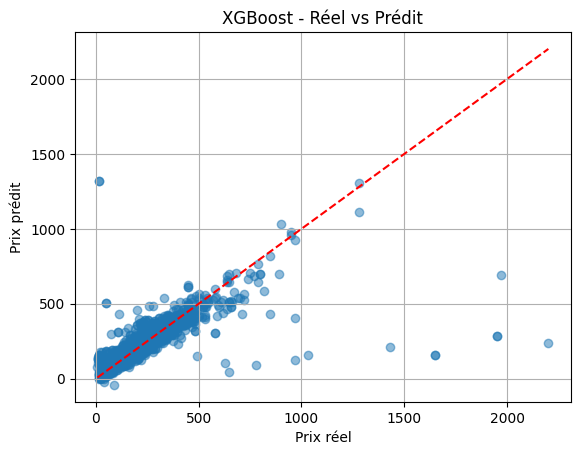

In [ ]:
# Graphique
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Prix réel")
plt.ylabel("Prix prédit")
plt.title("XGBoost - Réel vs Prédit")
plt.grid(True)
plt.show()

In [ ]:
# Sauvegarde
joblib.dump(best_model, "xgb_model_voiture_transformed.pkl")

['xgb_model_voiture_transformed.pkl']

In [ ]:
# Chargement du modèle
model = joblib.load("xgb_model_voiture_transformed.pkl")

# Exemple de voiture
voiture = pd.DataFrame([{
    'BoiteàV': 1,
    'Carburant': 1,
    'kilometrage': -0.90,  # déstandardisé
    'NBporte': 5,
    'Origine': 1.0,         # même encodage que dataset
    'Première main': 1.0,
    'Puissance fiscale': -0.75,
    'Etat': 1.0,
    'Age': -0.60,
    'Limiteur de vitesse': 1,
    'Jantes aluminium': 0,
    'CD/MP3/Bluetooth': 1,
    'Climatisation': 1,
    'Vitres électriques': 1,
    'Verrouillage centralisé à distance': 0,
    'Airbags': 1,
    'Caméra de recul': 1,
    'Système de navigation/GPS': 1,
    'Radar de recul': 0,
    'ESP': 1,
    'ABS': 1,
    'Ordinateur de bord': 1,
    'Régulateur de vitesse': 1,
    'Sièges cuir': 0,
    'Toit ouvrant': 0,
    'Marque_freq': 0.09,
    'Modèle_freq': 0.01
}])

# Prédiction
prix_estime = model.predict(voiture)
print(f"💰 Prix estimé : {prix_estime[0]:.2f} K DH")

💰 Prix estimé : 134.61 K DH


In [ ]:
# Exemple de voiture
voiture_test_2 = pd.DataFrame([{
    'BoiteàV': 1,
    'Carburant': 0,
    'kilometrage': -0.75,  # Déstandardisé
    'NBporte': 5,
    'Origine': 1.0,
    'Première main': 1.0,
    'Puissance fiscale': -0.75,
    'Etat': 1.0,
    'Age': -0.60,
    'Limiteur de vitesse': 1,
    'Jantes aluminium': 0,
    'CD/MP3/Bluetooth': 1,
    'Climatisation': 1,
    'Vitres électriques': 1,
    'Verrouillage centralisé à distance': 1,
    'Airbags': 1,
    'Caméra de recul': 1,
    'Système de navigation/GPS': 1,
    'Radar de recul': 0,
    'ESP': 1,
    'ABS': 1,
    'Ordinateur de bord': 1,
    'Régulateur de vitesse': 1,
    'Sièges cuir': 1,
    'Toit ouvrant': 0,
    'Marque_freq': 0.09,
    'Modèle_freq': 0.01
}])

# Prédiction
prix_estime_2 = model.predict(voiture_test_2)
print(f"💰 Prix estimé : {prix_estime_2[0]:.2f} K DH")

💰 Prix estimé : 204.58 K DH
